<a href="https://colab.research.google.com/github/Sheady0117/sheas-ml-repo/blob/main/SheaDanahy_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing and Pre-processing of Data


In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255


## Creation and Fitting of Model

In [5]:
from keras import models
from keras import layers


model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())

model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model1.fit(
    train_images, 
    train_labels,
    validation_split=0.2,
    steps_per_epoch=100,
    epochs=30,
)

Epoch 1/30
100/100 [==============================] - 12s 29ms/step - loss: 2.0145 - accuracy: 0.2664 - val_loss: 1.7363 - val_accuracy: 0.3734
Epoch 2/30
100/100 [==============================] - 3s 26ms/step - loss: 1.6996 - accuracy: 0.3923 - val_loss: 1.6634 - val_accuracy: 0.4005
Epoch 3/30
100/100 [==============================] - 3s 29ms/step - loss: 1.5548 - accuracy: 0.4418 - val_loss: 1.6962 - val_accuracy: 0.3848
Epoch 4/30
100/100 [==============================] - 3s 27ms/step - loss: 1.4590 - accuracy: 0.4764 - val_loss: 1.5524 - val_accuracy: 0.4564
Epoch 5/30
100/100 [==============================] - 3s 31ms/step - loss: 1.3781 - accuracy: 0.5096 - val_loss: 1.3457 - val_accuracy: 0.5261
Epoch 6/30
100/100 [==============================] - 3s 25ms/step - loss: 1.3009 - accuracy: 0.5414 - val_loss: 1.2494 - val_accuracy: 0.5524
Epoch 7/30
100/100 [==============================] - 3s 25ms/step - loss: 1.2402 - accuracy: 0.5626 - val_loss: 1.2611 - val_accuracy: 0.549

In [8]:
loss, acc = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.0413 - accuracy: 0.6705


##Sequential Model With Image Augumentation

In [ ]:
!rm -rf cifar10

In [9]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!tar -xf cifar10.tgz
!rm cifar10.tgz
!mkdir /content/cifar10/split
!ls cifar10

--2022-12-07 17:47:05--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.139.48, 54.231.228.96, 52.216.93.253, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.139.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz’

cifar10.tgz         100%[===================>] 128.85M  57.5MB/s    in 2.2s    

2022-12-07 17:47:07 (57.5 MB/s) - ‘cifar10.tgz’ saved [135107811/135107811]

split  test  train


In [10]:
og_train_dir = '/content/cifar10/train'
test_dir = '/content/cifar10/test'
split_dir = '/content/cifar10/split'

In [11]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


I found this library when searching better ways to divide the data between training and testing sets. Here's the link to the article.

https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

In [12]:
import splitfolders

splitfolders.ratio(og_train_dir, 
                    output=split_dir,
                    seed = 42,
                    ratio=(0.8, 0.2),
                    group_prefix=None,
                    move=False
                    )

train_dir = '/content/cifar10/split/train'
validation_dir = '/content/cifar10/split/val'

Copying files: 50000 files [00:13, 3623.08 files/s]


In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=30,
        class_mode='categorical')

        
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),
        batch_size=30,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=30,
        class_mode='categorical')


Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


###Create and Fit Model

In [15]:
from keras import models
from keras import layers

aug_model = models.Sequential()

aug_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
aug_model.add(layers.MaxPooling2D((2, 2)))
aug_model.add(layers.Conv2D(64, (3,3), activation ='relu'))
aug_model.add(layers.MaxPooling2D((2,2)))
aug_model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
aug_model.add(layers.MaxPooling2D((2,2)))
#aug_model.add(layers.Conv2D(128, (3,3), activation = 'relu')
#aug_model.add(layers.MaxPooling2D((2,2)))
aug_model.add(layers.Flatten())

aug_model.add(layers.Dropout(0.5))

aug_model.add(layers.Dense(512, activation='relu'))
aug_model.add(layers.Dense(10, activation = 'sigmoid'))

aug_model.summary()


# The commented code was causing an error which I couldn't figure out how correct.
# I added padding='same' to the all Conv2D layers and to that one in particular. It fixed the issue but that reduced the training pool by 1/4. 
# The error is posted below. 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 128)       

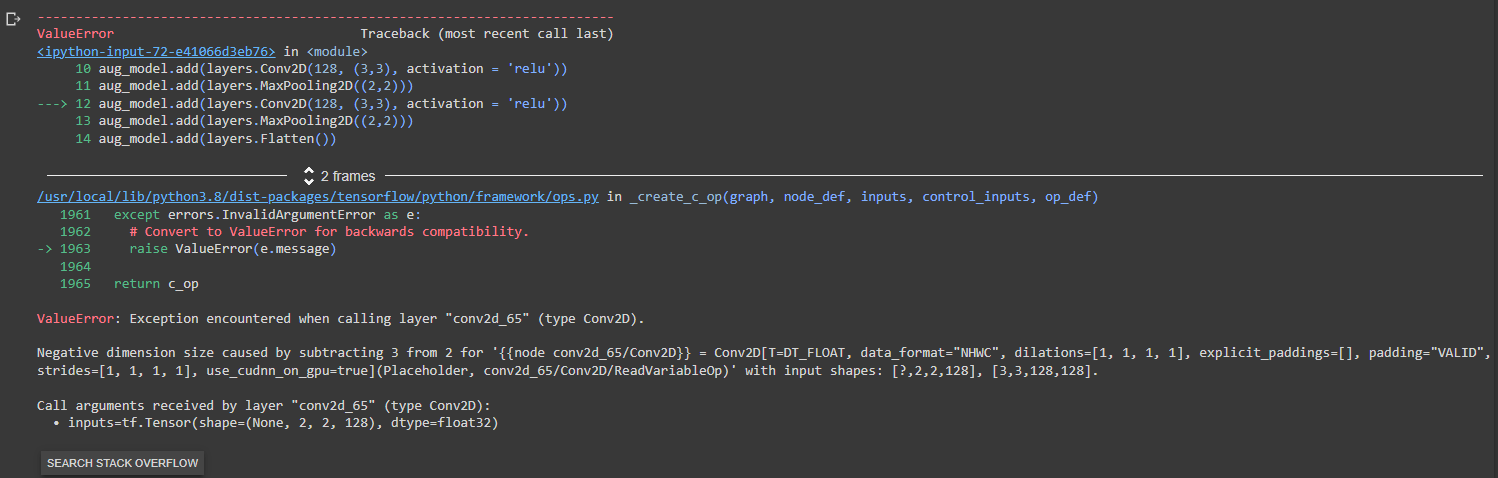

In [16]:
aug_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics='accuracy')

In [17]:
history2 = aug_model.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=100,
          validation_data = validation_generator,
          validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 5s 39ms/step - loss: 2.2172 - accuracy: 0.1663 - val_loss: 2.3045 - val_accuracy: 0.1753
Epoch 2/100
100/100 [==============================] - 4s 38ms/step - loss: 2.0863 - accuracy: 0.2133 - val_loss: 1.8799 - val_accuracy: 0.3020
Epoch 3/100
100/100 [==============================] - 4s 38ms/step - loss: 1.9833 - accuracy: 0.2658 - val_loss: 1.8098 - val_accuracy: 0.3493
Epoch 4/100
100/100 [==============================] - 4s 37ms/step - loss: 1.9599 - accuracy: 0.2720 - val_loss: 1.7850 - val_accuracy: 0.3220
Epoch 5/100
100/100 [==============================] - 4s 37ms/step - loss: 1.9353 - accuracy: 0.2900 - val_loss: 1.7624 - val_accuracy: 0.3487
Epoch 6/100
100/100 [==============================] - 4s 36ms/step - loss: 1.9024 - accuracy: 0.2983 - val_loss: 1.7159 - val_accuracy: 0.3867
Epoch 7/100
100/100 [==============================] - 4s 39ms/step - loss: 1.8742 - accuracy: 0.3080 - val_loss: 1.7020 - val_accuracy:

In [19]:
scoreSeg = aug_model.evaluate(test_generator)

334/334 [==============================] - 4s 13ms/step - loss: 1.2622 - accuracy: 0.5569


##Conclusions



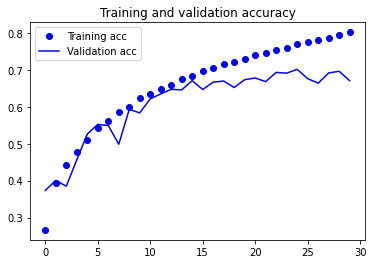

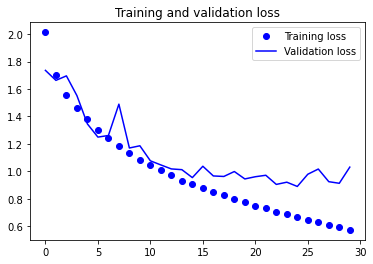

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

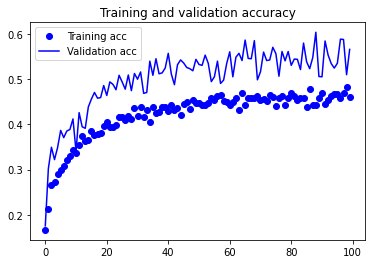

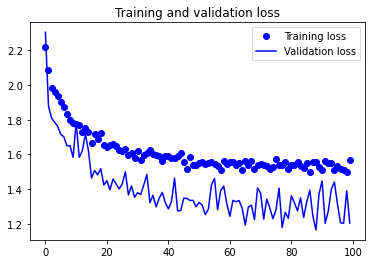

In [23]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Conclusions

In the first model, the accuracy ended up being ~67% which isn't good but isn't terrible. It approached the same score of the same approach in the CNN Lab. I was thankfully able to import the data in the same way that I did with the MNIST dataset as Keras has a cifar10 built in. 

I then decided to try to run the same model but with augumented image data instead, which required me to utalize a different method for loading the data. I opted to utalize the split-folders library to create the validation set from the training set with an 80-20 split.

The results for the second model were disappointing to say the least. The accuracy never got higher than the first model, and the validation loss fluctuated wildly as is shown in the graph above. The testing set accuracy was barely better than a coin toss at ~55%. I suspect this has to do with overfitting the data, due to there only being 361,034 trainable parameters. The error that stopped me from adding anymore CONV2D is the root of this issue. 

The code for the second model requires further revision to correct the error, however the time remaining in the semester won't permit that. 